In [265]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [266]:
# Load train data

train = pd.read_csv('train_v9rqX0R.csv')
train_copy = train.copy()
print("Shape of Data : ",train.shape)
train.head()

Shape of Data :  (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [268]:
# Load test data

test = pd.read_csv('test_AbJTz2l.csv')
test_copy = test.copy()
print("Shape of Data : ",test.shape)
test.head()

Shape of Data :  (5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Data Exploration

In [270]:
# Variable Identification

# Categorical Columns

def cat_cols(dataframe):
    return list(dataframe.select_dtypes(include='object').columns)

categorical_columns = cat_cols(train)

In [271]:
# Numerical columns

def num_cols(dataframe):
    return list(dataframe.select_dtypes(include='number').columns)

numerical_columns = num_cols(train)

In [272]:
print("Categorical Columns :\n",categorical_columns)
print("\nNumerical Columns :\n",numerical_columns)

Categorical Columns :
 ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

Numerical Columns :
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


## Univariate  Analysis

In [273]:
# Univariate Analysis

# Value counts of categorical columns

for i in categorical_columns:
    print("{0}\n\n{1}\n\n".format(i,train[i].value_counts()))

Item_Identifier

FDW13    10
FDG33    10
FDX04     9
NCJ30     9
FDW26     9
         ..
FDN52     1
FDQ60     1
FDC23     1
FDT35     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Content

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010  

In [274]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


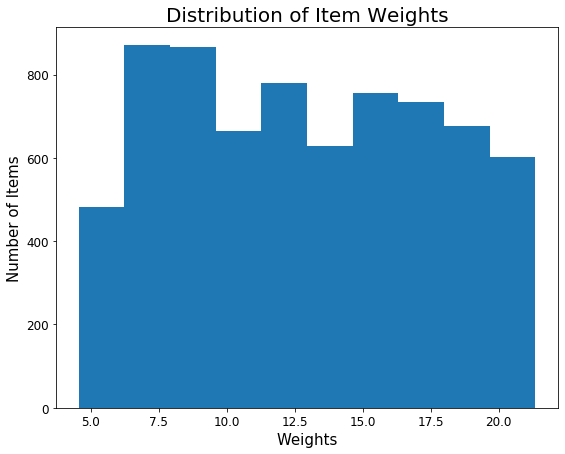

In [275]:
# Item Weight Distribution

plt.figure(figsize=[9,7])
plt.hist(train['Item_Weight'])
plt.title("Distribution of Item Weights",fontsize=20)
plt.xlabel("Weights",fontsize=15)
plt.ylabel("Number of Items",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

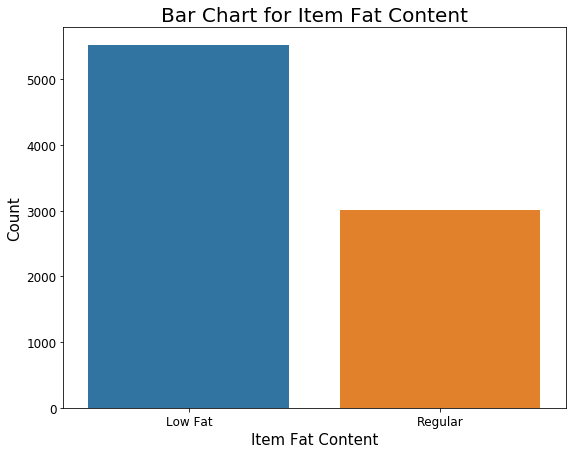

In [276]:
# Combining valuues having same meaning

train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

# Fat Content

plt.figure(figsize=[9,7])
sns.countplot(train['Item_Fat_Content'])
plt.title('Bar Chart for Item Fat Content',fontsize=20)
plt.xlabel("Item Fat Content",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

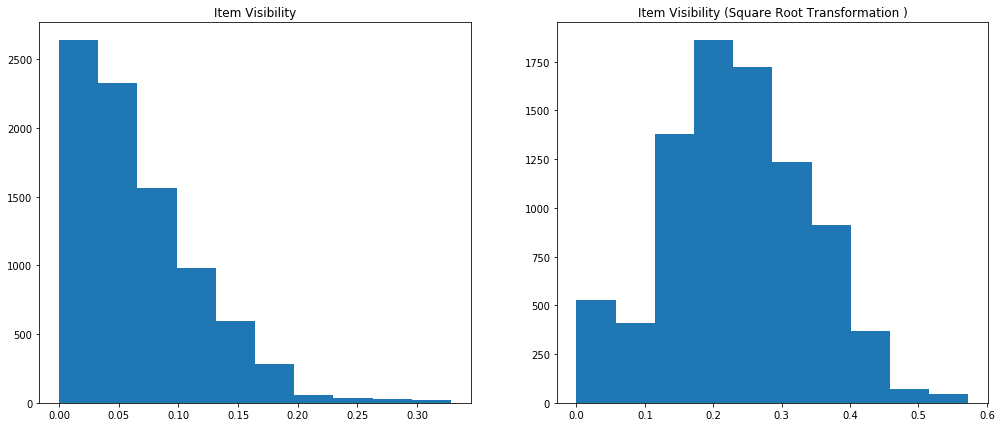

In [277]:
# Item Visibility

fig, (ax1,ax2) = plt.subplots(1,2,figsize=[17,7])

ax1.hist((train['Item_Visibility']))
ax1.title.set_text('Item Visibility')
ax2.hist(np.sqrt(train['Item_Visibility']));
ax2.title.set_text('Item Visibility (Square Root Transformation )')

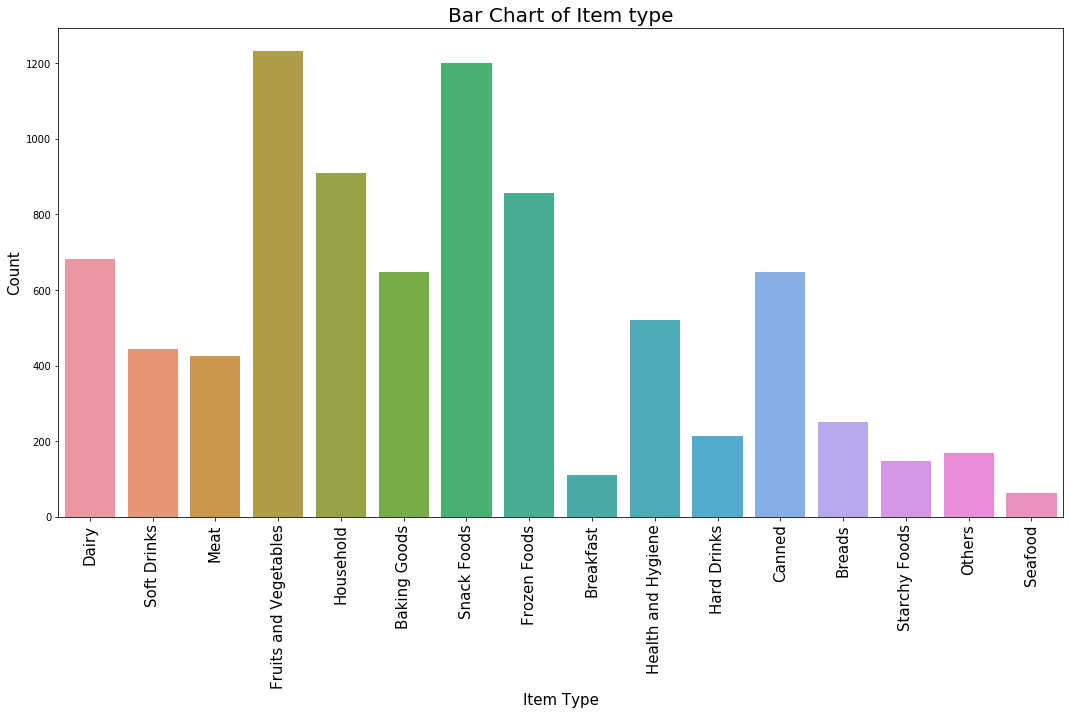

In [278]:
# Bar Chart of Item Type

plt.figure(figsize=[18,9])
sns.countplot(train['Item_Type'],orient='h')
plt.xticks(rotation=90,fontsize=15)
plt.title("Bar Chart of Item type",fontsize=20)
plt.xlabel("Item Type",fontsize=15)
plt.ylabel("Count",fontsize=15);

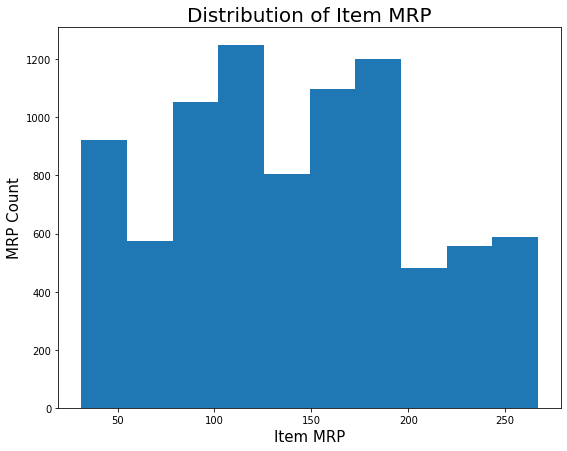

In [279]:
# Distribution of Item MRP

plt.figure(figsize=[9,7])
plt.hist(train['Item_MRP'])
plt.title("Distribution of Item MRP",fontsize=20)
plt.xlabel("Item MRP",fontsize=15)
plt.ylabel("MRP Count",fontsize=15);

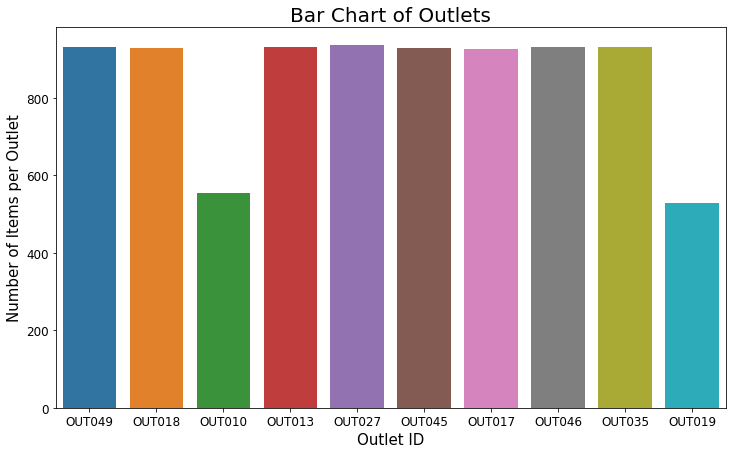

In [280]:
# Bar Chart of Outlets

plt.figure(figsize=[12,7])
sns.countplot(train['Outlet_Identifier'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bar Chart of Outlets",fontsize=20)
plt.xlabel("Outlet ID",fontsize=15)
plt.ylabel("Number of Items per Outlet",fontsize=15);

In [281]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [282]:
# Outlets and Their establishment year

for i in train['Outlet_Identifier'].unique():
    print("{0}\n{1}".format(i,train[train['Outlet_Identifier']==i]['Outlet_Establishment_Year'].value_counts()))
    print("\n*****************\n")

OUT049
1999    930
Name: Outlet_Establishment_Year, dtype: int64

*****************

OUT018
2009    928
Name: Outlet_Establishment_Year, dtype: int64

*****************

OUT010
1998    555
Name: Outlet_Establishment_Year, dtype: int64

*****************

OUT013
1987    932
Name: Outlet_Establishment_Year, dtype: int64

*****************

OUT027
1985    935
Name: Outlet_Establishment_Year, dtype: int64

*****************

OUT045
2002    929
Name: Outlet_Establishment_Year, dtype: int64

*****************

OUT017
2007    926
Name: Outlet_Establishment_Year, dtype: int64

*****************

OUT046
1997    930
Name: Outlet_Establishment_Year, dtype: int64

*****************

OUT035
2004    930
Name: Outlet_Establishment_Year, dtype: int64

*****************

OUT019
1985    528
Name: Outlet_Establishment_Year, dtype: int64

*****************



All unique Outlets have the same year of establishment

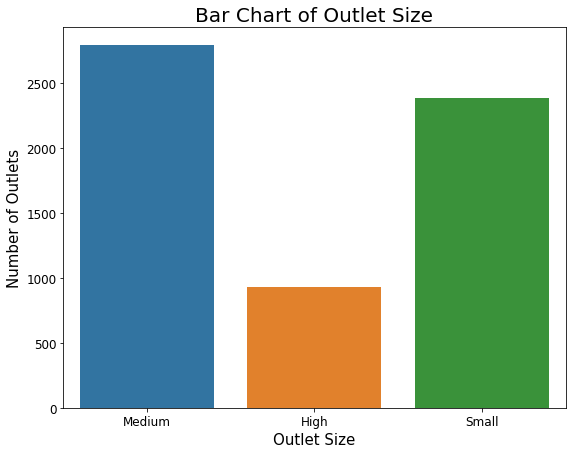

In [283]:
# Outlet Size

plt.figure(figsize=[9,7])
sns.countplot(train['Outlet_Size'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bar Chart of Outlet Size",fontsize=20)
plt.xlabel("Outlet Size",fontsize=15)
plt.ylabel("Number of Outlets",fontsize=15);

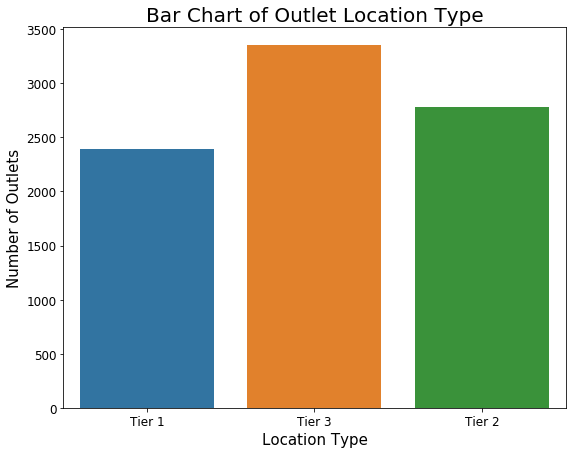

In [284]:
# Outlet Location Type

plt.figure(figsize=[9,7])
sns.countplot(train['Outlet_Location_Type'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bar Chart of Outlet Location Type",fontsize=20)
plt.xlabel("Location Type",fontsize=15)
plt.ylabel("Number of Outlets",fontsize=15);

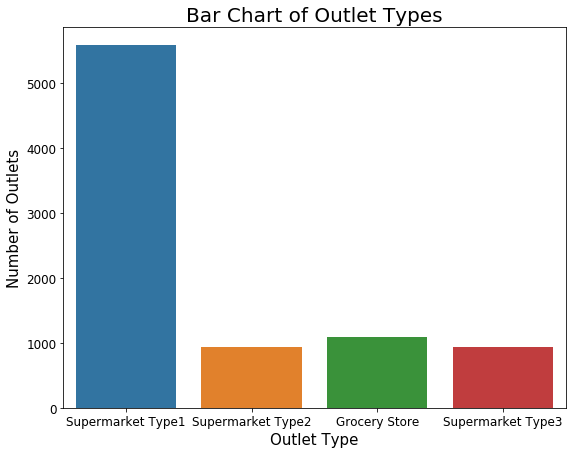

In [285]:
# Outlet Type

plt.figure(figsize=[9,7])
sns.countplot(train['Outlet_Type'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bar Chart of Outlet Types",fontsize=20)
plt.xlabel("Outlet Type",fontsize=15)
plt.ylabel("Number of Outlets",fontsize=15);

## Bivariate Analysis

In [286]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


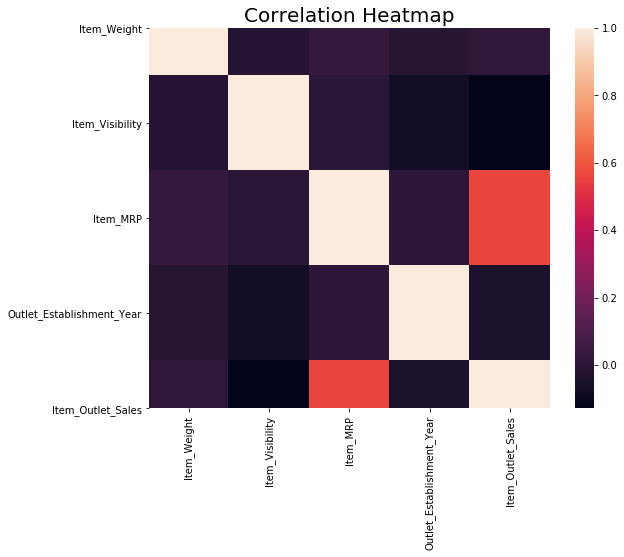

In [287]:
# Correlation of continuous variables

plt.figure(figsize=[9,7])
sns.heatmap(train.corr())
plt.title("Correlation Heatmap",fontsize=20);

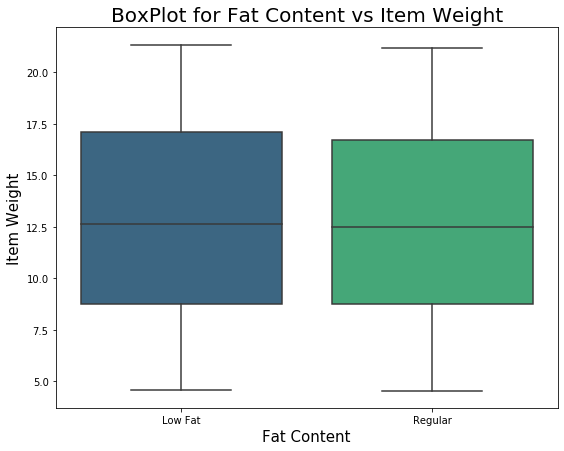

In [288]:
# Boxplot for Fat Content vs Item Weight

plt.figure(figsize=[9,7])
sns.boxplot("Item_Fat_Content","Item_Weight",data=train,palette='viridis')
plt.title('BoxPlot for Fat Content vs Item Weight',fontsize=20)
plt.xlabel("Fat Content",fontsize=15)
plt.ylabel("Item Weight",fontsize=15);

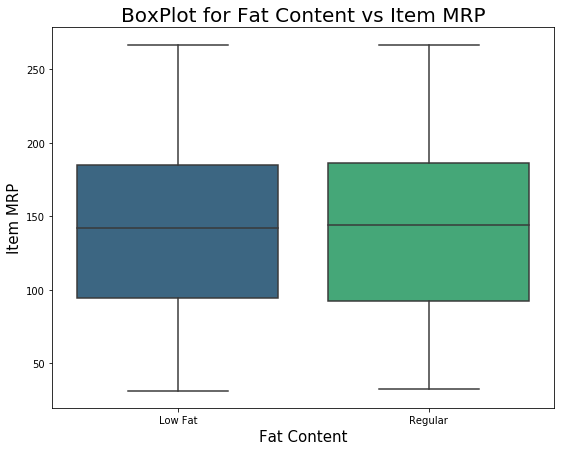

In [289]:
# BoxPlot for Fat Content vs Item MRP

plt.figure(figsize=[9,7])
sns.boxplot("Item_Fat_Content","Item_MRP",data=train,palette='viridis')
plt.title('BoxPlot for Fat Content vs Item MRP',fontsize=20)
plt.xlabel("Fat Content",fontsize=15)
plt.ylabel("Item MRP",fontsize=15);

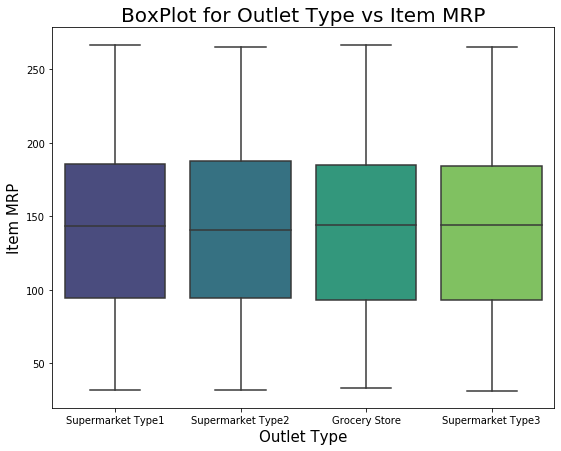

In [290]:
# BoxPlot for Outlet Type vs Item MRP

plt.figure(figsize=[9,7])
sns.boxplot("Outlet_Type","Item_MRP",data=train,palette='viridis')
plt.title('BoxPlot for Outlet Type vs Item MRP',fontsize=20)
plt.xlabel("Outlet Type",fontsize=15)
plt.ylabel("Item MRP",fontsize=15);

## Missing Values 

In [291]:
def missing_values(dataframe):
    counts = dataframe.isnull().sum()
    percent = dataframe.isnull().sum()/dataframe.shape[0]*100
    return pd.DataFrame({"Count":counts,"Percntage":percent},index=dataframe.isnull().sum().index)

missing_values(train)

,Count,Percntage
Item_Identifier,0,0.000000
Item_Weight,1463,17.165317
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,2410,28.276428
Outlet_Location_Type,0,0.000000


In [292]:
# Outlet IDs that have missing values in Outlet Size

train[train['Outlet_Size'].isna()]['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [293]:
# Outlet Types of Outlets that have missing values

print("\nOUT010 is of type",train[train['Outlet_Identifier']=='OUT010']['Outlet_Type'].unique()[0])
print("\nOUT045 is of type",train[train['Outlet_Identifier']=='OUT045']['Outlet_Type'].unique()[0])
print("\nOUT017 is of type",train[train['Outlet_Identifier']=='OUT017']['Outlet_Type'].unique()[0])


OUT010 is of type Grocery Store

OUT045 is of type Supermarket Type1

OUT017 is of type Supermarket Type1


In [294]:
# Outlet sizes for Outlet Type

print("Outlet Sizes for Grocery Store are",train[train['Outlet_Type']=='Grocery Store']['Outlet_Size'].unique())
print("Outlet Sizes for Supermarket Type1 are",train[train['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].unique())

Outlet Sizes for Grocery Store are [nan 'Small']
Outlet Sizes for Supermarket Type1 are ['Medium' 'High' nan 'Small']


In [295]:
print("Most Outlets of SuperMarket Type1 have outlet size :",train[train['Outlet_Type']=='Supermarket Type1']['Outlet_Size'].value_counts().idxmax())

Most Outlets of SuperMarket Type1 have outlet size : Small


### PTR

From above lines of code i decided to impute "Small" for all missing values in Outlet Size

Point to note is only outlets OUT019 and OUT027 had all the missing values in Item Weight column so these 2 outlets do not record Item Weights at all

In [296]:
# Impute missing values

train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size'] = train['Outlet_Size'].fillna("Small")

missing_values(train)

,Count,Percntage
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


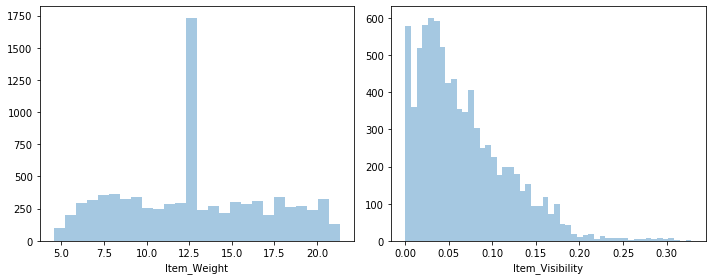

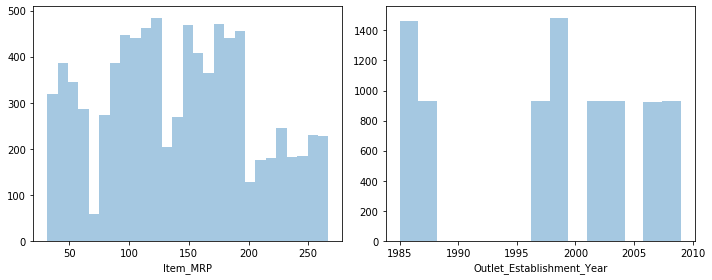

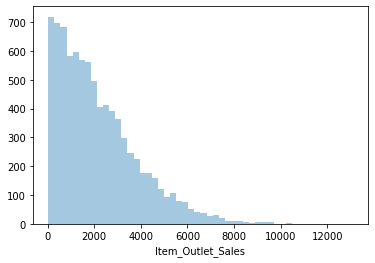

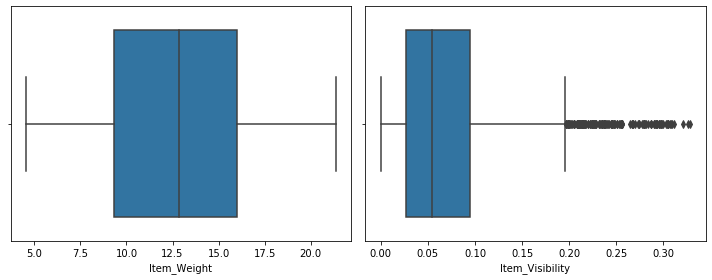

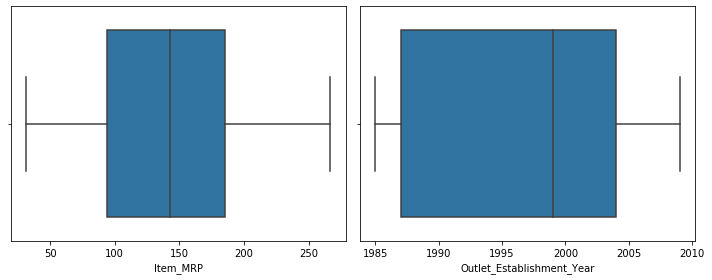

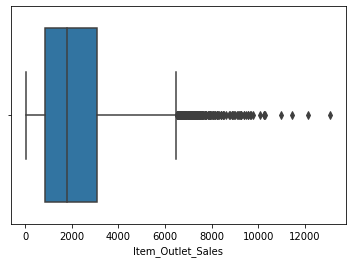

In [297]:
# Function to plot histograms

def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)            
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(train)            
plot_box_plots(train)


## Outlier Detection and Treatment

In [298]:
# Function to detect outliers in every feature

def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(train)


,Feature,Number of Outliers
0,Item_Weight,0
1,Item_Visibility,144
2,Item_MRP,0
3,Outlet_Establishment_Year,0
4,Item_Outlet_Sales,186


## Variable Transformation

Earlier we saw Item visibility column was right skewed so we will use square root transformation on it.

In [299]:
# Square Root transformation on Item visibility

train['Item_Visibility'] = np.sqrt(train['Item_Visibility'])

In [300]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [301]:
# Splitting data into Features and target

X = train.iloc[:,:-1].drop("Item_Identifier",axis=1)
y = train['Item_Outlet_Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)

In [302]:
# Label Encoding categorical variables

cols_to_encode = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

le = LabelEncoder()

for i in cols_to_encode:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

In [303]:
# Scaling features to the same scale

minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

# Train Models

In [304]:
# Linear Regression

linear = LinearRegression()
linear.fit(X_train_scaled,y_train)
lin_pred = linear.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,lin_pred))

1219.5833955498772

In [305]:
# KNeigbours Regressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train,y_train)
knn_pred = knn_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test,knn_pred))

1224.1243528201637

In [306]:
# Decision Tree Regressor

dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train_scaled,y_train)
dt_pred = dt_reg.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,dt_pred))

1117.47800982881

In [307]:
# Support Vector Machines

svr = SVR(kernel='poly')
svr.fit(X_train_scaled,y_train)
svr_pred = svr.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,svr_pred))

1218.204615430914

In [308]:
# Random Forest

rf_reg = RandomForestRegressor(max_depth=5)
rf_reg.fit(X_train,y_train)
rf_pred = rf_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test,rf_pred))

1101.338543687715

In [309]:
# AdaBoost

ada_reg = AdaBoostRegressor(learning_rate=0.1)
ada_reg.fit(X_train,y_train)
ada_pred = ada_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test,ada_pred))

1132.4812584303165

In [310]:
# Gradient Boost

gb_reg = GradientBoostingRegressor(learning_rate=0.1)
gb_reg.fit(X_train,y_train)
gb_pred = gb_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test,gb_pred))

1104.5344064842893

In [311]:
# XGBoost

xgb_reg = XGBRegressor(max_depth=2)
xgb_reg.fit(X_train,y_train)
xgb_pred = xgb_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test,xgb_pred))

[13:46:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1101.022166845885

# Test Models

In [312]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Applying Preprocessing on Test Data

In [313]:
# Applying transformation on Fat Content column

test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [314]:
missing_values(test)

,Count,Percntage
Item_Identifier,0,0.000000
Item_Weight,976,17.180074
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,1606,28.269671
Outlet_Location_Type,0,0.000000


In [315]:
# Impute missing values

test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())
test['Outlet_Size'] = test['Outlet_Size'].fillna("Small")

missing_values(test)

,Count,Percntage
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


In [316]:
detect_outliers(test)

,Feature,Number of Outliers
0,Item_Weight,0
1,Item_Visibility,113
2,Item_MRP,0
3,Outlet_Establishment_Year,0


In [317]:
# Square Root Transformation on Item Visibility

test['Item_Visibility'] = np.sqrt(test['Item_Visibility'])

In [318]:
# Preparing Data for Model Training

train_X = X
train_y = y
test_X = test[X.columns]

In [319]:
# Label Encoding the data

le = LabelEncoder()

for i in cols_to_encode:
    train_X[i] = le.fit_transform(train_X[i])
    test_X[i] = le.transform(test_X[i])

In [320]:
# Random Forest

rf = RandomForestRegressor(max_depth=5)
rf.fit(train_X,train_y)
pred_y = rf.predict(test_X)

In [321]:
final_output_df = pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier'],
              'Item_Outlet_Sales':pred_y}).set_index(['Item_Identifier','Outlet_Identifier'])

In [322]:
final_output_df.to_csv('C:/Data Science/Jupyter Notebook/Practice Hackathons/Big Mart Sales Prediction/rf_predictions.csv')